In [94]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

In [95]:
data = pd.read_csv('kalp1.csv', sep=';')
data.head()

,Yas,Cinsiyet,Gogus_agrisi_tipi,Dinlenme_kan_basinci,Kolesterol,Aclik_kan_sekeri,Istirahat_elektrokardiyogram_sonuclari,Maximum_kalp_atis_hizi,Egzersize_bagli_anjina,st_segmentinin_egimi,Kalp_hasta
0,40,2,3,140.0,289.0,1,1,172,2,3,Yok
1,49,1,2,160.0,180.0,1,1,156,2,2,Var
2,37,2,3,130.0,283.0,1,2,98,2,3,Yok
3,48,1,1,138.0,214.0,1,1,108,1,2,Var
4,54,2,2,150.0,195.0,1,1,122,2,3,Yok


In [96]:
len(data)

918

In [97]:
data.shape 

(918, 11)

In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Yas                                     918 non-null    int64  
 1   Cinsiyet                                918 non-null    int64  
 2   Gogus_agrisi_tipi                       918 non-null    int64  
 3   Dinlenme_kan_basinci                    918 non-null    float64
 4   Kolesterol                              918 non-null    float64
 5   Aclik_kan_sekeri                        918 non-null    int64  
 6   Istirahat_elektrokardiyogram_sonuclari  918 non-null    int64  
 7   Maximum_kalp_atis_hizi                  918 non-null    int64  
 8   Egzersize_bagli_anjina                  918 non-null    int64  
 9   st_segmentinin_egimi                    918 non-null    int64  
 10  Kalp_hasta                              918 non-null    object

In [99]:
data.describe()

,Yas,Cinsiyet,Gogus_agrisi_tipi,Dinlenme_kan_basinci,Kolesterol,Aclik_kan_sekeri,Istirahat_elektrokardiyogram_sonuclari,Maximum_kalp_atis_hizi,Egzersize_bagli_anjina,st_segmentinin_egimi
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,1.789760,1.748366,132.540745,236.293149,1.233115,1.603486,136.809368,1.595861,2.361656
std,9.432617,0.407701,0.931031,17.989932,56.080127,0.423046,0.805968,25.460334,0.490992,0.607056
min,28.000000,1.000000,1.000000,80.000000,85.000000,1.000000,1.000000,60.000000,1.000000,1.000000
25%,47.000000,2.000000,1.000000,120.000000,200.111111,1.000000,1.000000,120.000000,1.000000,2.000000
50%,54.000000,2.000000,1.000000,130.000000,223.000000,1.000000,1.000000,138.000000,2.000000,2.000000
75%,60.000000,2.000000,2.000000,140.000000,267.000000,1.000000,2.000000,156.000000,2.000000,3.000000
max,77.000000,2.000000,4.000000,200.000000,603.000000,2.000000,3.000000,202.000000,2.000000,3.000000


In [100]:
data.duplicated().sum()

0

In [101]:
data.isnull().sum()

Yas                                       0
Cinsiyet                                  0
Gogus_agrisi_tipi                         0
Dinlenme_kan_basinci                      0
Kolesterol                                0
Aclik_kan_sekeri                          0
Istirahat_elektrokardiyogram_sonuclari    0
Maximum_kalp_atis_hizi                    0
Egzersize_bagli_anjina                    0
st_segmentinin_egimi                      0
Kalp_hasta                                0
dtype: int64

In [102]:
data.nunique()

Yas                                        50
Cinsiyet                                    2
Gogus_agrisi_tipi                           4
Dinlenme_kan_basinci                       67
Kolesterol                                222
Aclik_kan_sekeri                            2
Istirahat_elektrokardiyogram_sonuclari      3
Maximum_kalp_atis_hizi                    119
Egzersize_bagli_anjina                      2
st_segmentinin_egimi                        3
Kalp_hasta                                  2
dtype: int64

In [103]:
data.columns

Index(['Yas', 'Cinsiyet', 'Gogus_agrisi_tipi', 'Dinlenme_kan_basinci',
       'Kolesterol', 'Aclik_kan_sekeri',
       'Istirahat_elektrokardiyogram_sonuclari', 'Maximum_kalp_atis_hizi',
       'Egzersize_bagli_anjina', 'st_segmentinin_egimi', 'Kalp_hasta'],
      dtype='object')

In [104]:
data


,Yas,Cinsiyet,Gogus_agrisi_tipi,Dinlenme_kan_basinci,Kolesterol,Aclik_kan_sekeri,Istirahat_elektrokardiyogram_sonuclari,Maximum_kalp_atis_hizi,Egzersize_bagli_anjina,st_segmentinin_egimi,Kalp_hasta
0,40,2,3,140.0,289.0,1,1,172,2,3,Yok
1,49,1,2,160.0,180.0,1,1,156,2,2,Var
2,37,2,3,130.0,283.0,1,2,98,2,3,Yok
3,48,1,1,138.0,214.0,1,1,108,1,2,Var
4,54,2,2,150.0,195.0,1,1,122,2,3,Yok
...,...,...,...,...,...,...,...,...,...,...,...
913,45,2,4,110.0,264.0,1,1,132,2,2,Var
914,68,2,1,144.0,193.0,2,1,141,2,2,Var
915,57,2,1,130.0,131.0,1,1,115,1,2,Var
916,57,1,3,130.0,236.0,1,3,174,2,2,Var


In [105]:
degistir={'Yok': 0 , 'Var': 1}
data['Kalp_hasta'] = data['Kalp_hasta'].replace(degistir)
data

,Yas,Cinsiyet,Gogus_agrisi_tipi,Dinlenme_kan_basinci,Kolesterol,Aclik_kan_sekeri,Istirahat_elektrokardiyogram_sonuclari,Maximum_kalp_atis_hizi,Egzersize_bagli_anjina,st_segmentinin_egimi,Kalp_hasta
0,40,2,3,140.0,289.0,1,1,172,2,3,0
1,49,1,2,160.0,180.0,1,1,156,2,2,1
2,37,2,3,130.0,283.0,1,2,98,2,3,0
3,48,1,1,138.0,214.0,1,1,108,1,2,1
4,54,2,2,150.0,195.0,1,1,122,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...
913,45,2,4,110.0,264.0,1,1,132,2,2,1
914,68,2,1,144.0,193.0,2,1,141,2,2,1
915,57,2,1,130.0,131.0,1,1,115,1,2,1
916,57,1,3,130.0,236.0,1,3,174,2,2,1


In [106]:
for i in list(data.columns):
    print("{} --> {}".format(i,data[i].value_counts().shape[0]))

Yas --> 50
Cinsiyet --> 2
Gogus_agrisi_tipi --> 4
Dinlenme_kan_basinci --> 67
Kolesterol --> 222
Aclik_kan_sekeri --> 2
Istirahat_elektrokardiyogram_sonuclari --> 3
Maximum_kalp_atis_hizi --> 119
Egzersize_bagli_anjina --> 2
st_segmentinin_egimi --> 3
Kalp_hasta --> 2


In [107]:
kategorik=["Cinsiyet","Gogus_agrisi_tipi","Aclik_kan_sekeri","Istirahat_elektrokardiyogram_sonuclari","Egzersize_bagli_anjina","st_segmentinin_egimi","Kalp_hasta"]

In [108]:
data_kat=data.loc[:,kategorik]
data_kat

,Cinsiyet,Gogus_agrisi_tipi,Aclik_kan_sekeri,Istirahat_elektrokardiyogram_sonuclari,Egzersize_bagli_anjina,st_segmentinin_egimi,Kalp_hasta
0,2,3,1,1,2,3,0
1,1,2,1,1,2,2,1
2,2,3,1,2,2,3,0
3,1,1,1,1,1,2,1
4,2,2,1,1,2,3,0
...,...,...,...,...,...,...,...
913,2,4,1,1,2,2,1
914,2,1,2,1,2,2,1
915,2,1,1,1,1,2,1
916,1,3,1,3,2,2,1


In [109]:
data["Cinsiyet"].value_counts()

Cinsiyet
2    725
1    193
Name: count, dtype: int64

In [110]:
data[["Cinsiyet","Kalp_hasta"]].value_counts()


Cinsiyet  Kalp_hasta
2         1             458
          0             267
1         0             143
          1              50
Name: count, dtype: int64

In [111]:
gen = pd.crosstab(data['Cinsiyet'], data['Kalp_hasta'])
print(gen)

Kalp_hasta    0    1
Cinsiyet            
1           143   50
2           267  458


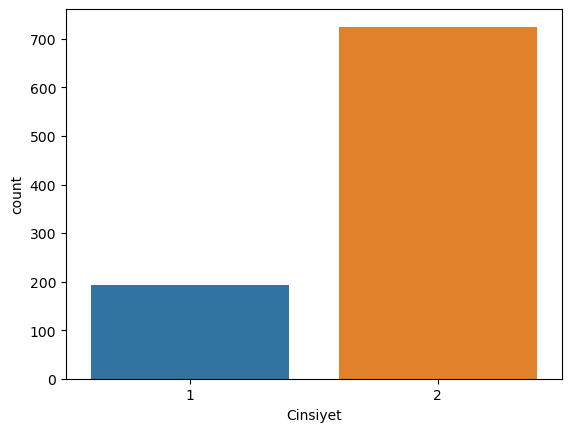

In [112]:
sns.countplot(x='Cinsiyet',data=data)
plt.show()

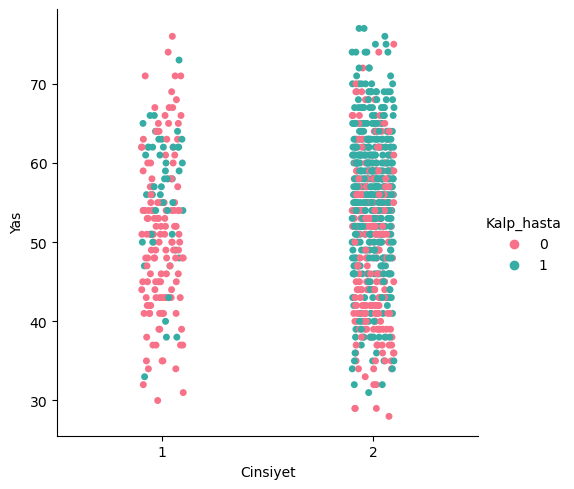

In [113]:
sns.catplot(data=data, x='Cinsiyet', y='Yas',  hue='Kalp_hasta', palette='husl')
plt.show()

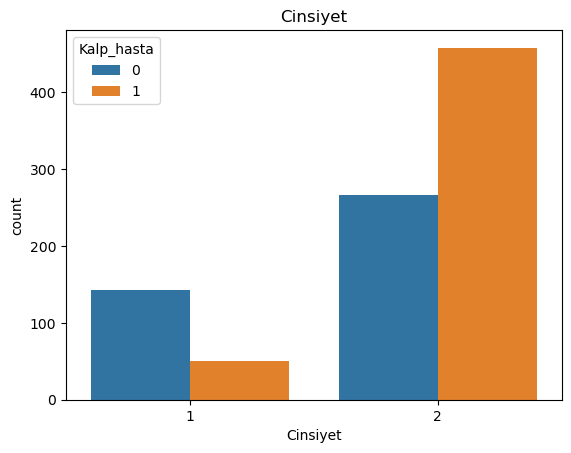

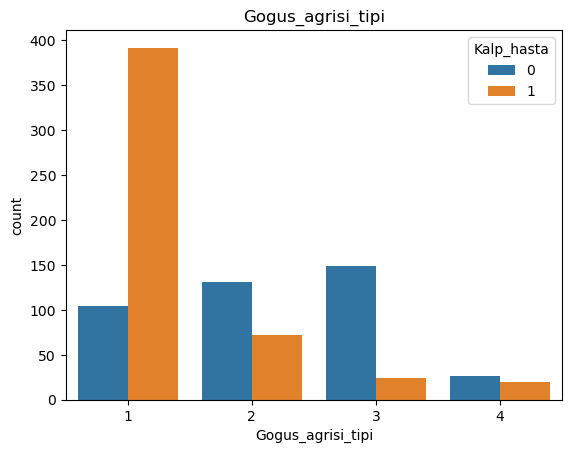

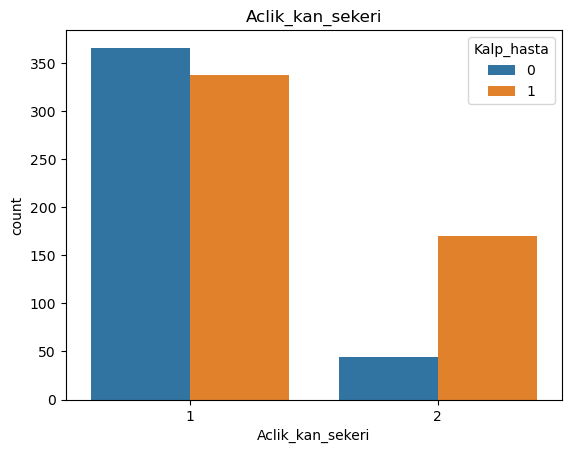

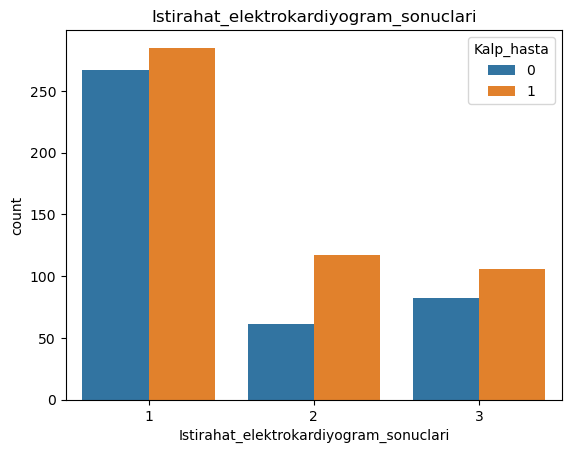

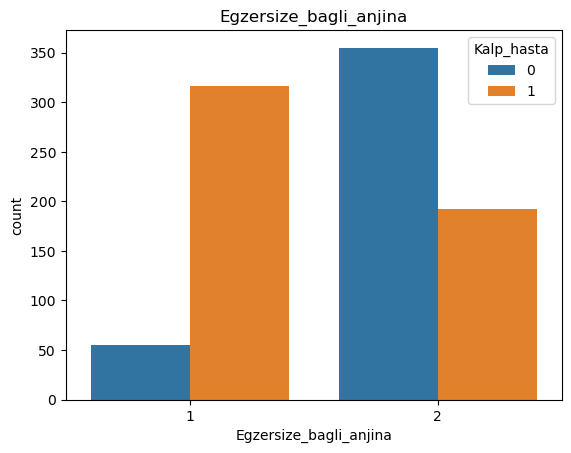

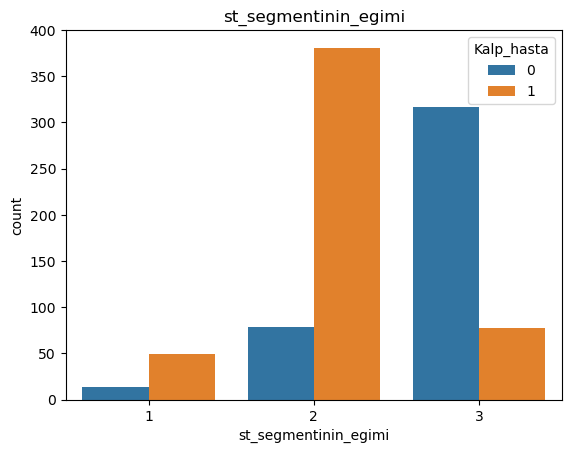

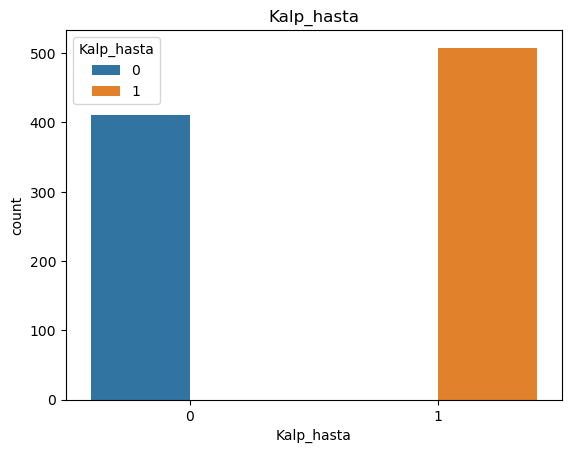

In [114]:
for i in data_kat:
    plt.figure()
    sns.countplot(x=i,data=data_kat,hue="Kalp_hasta")
    plt.title(i)

In [115]:
for i in list(data.columns):
    print("{}-->{}".format(i,data[i].value_counts().shape[0]))

Yas-->50
Cinsiyet-->2
Gogus_agrisi_tipi-->4
Dinlenme_kan_basinci-->67
Kolesterol-->222
Aclik_kan_sekeri-->2
Istirahat_elektrokardiyogram_sonuclari-->3
Maximum_kalp_atis_hizi-->119
Egzersize_bagli_anjina-->2
st_segmentinin_egimi-->3
Kalp_hasta-->2


In [116]:
sayisal = ["Yas", "Dinlenme_kan_basinci", "Kolesterol", "Maximum_kalp_atis_hizi", "Kalp_hasta"]
data_say = data.loc[:, sayisal]
print(data_say.head())
print(data_say.columns)



   Yas  Dinlenme_kan_basinci  Kolesterol  Maximum_kalp_atis_hizi  Kalp_hasta
0   40                 140.0       289.0                     172           0
1   49                 160.0       180.0                     156           1
2   37                 130.0       283.0                      98           0
3   48                 138.0       214.0                     108           1
4   54                 150.0       195.0                     122           0
Index(['Yas', 'Dinlenme_kan_basinci', 'Kolesterol', 'Maximum_kalp_atis_hizi',
       'Kalp_hasta'],
      dtype='object')


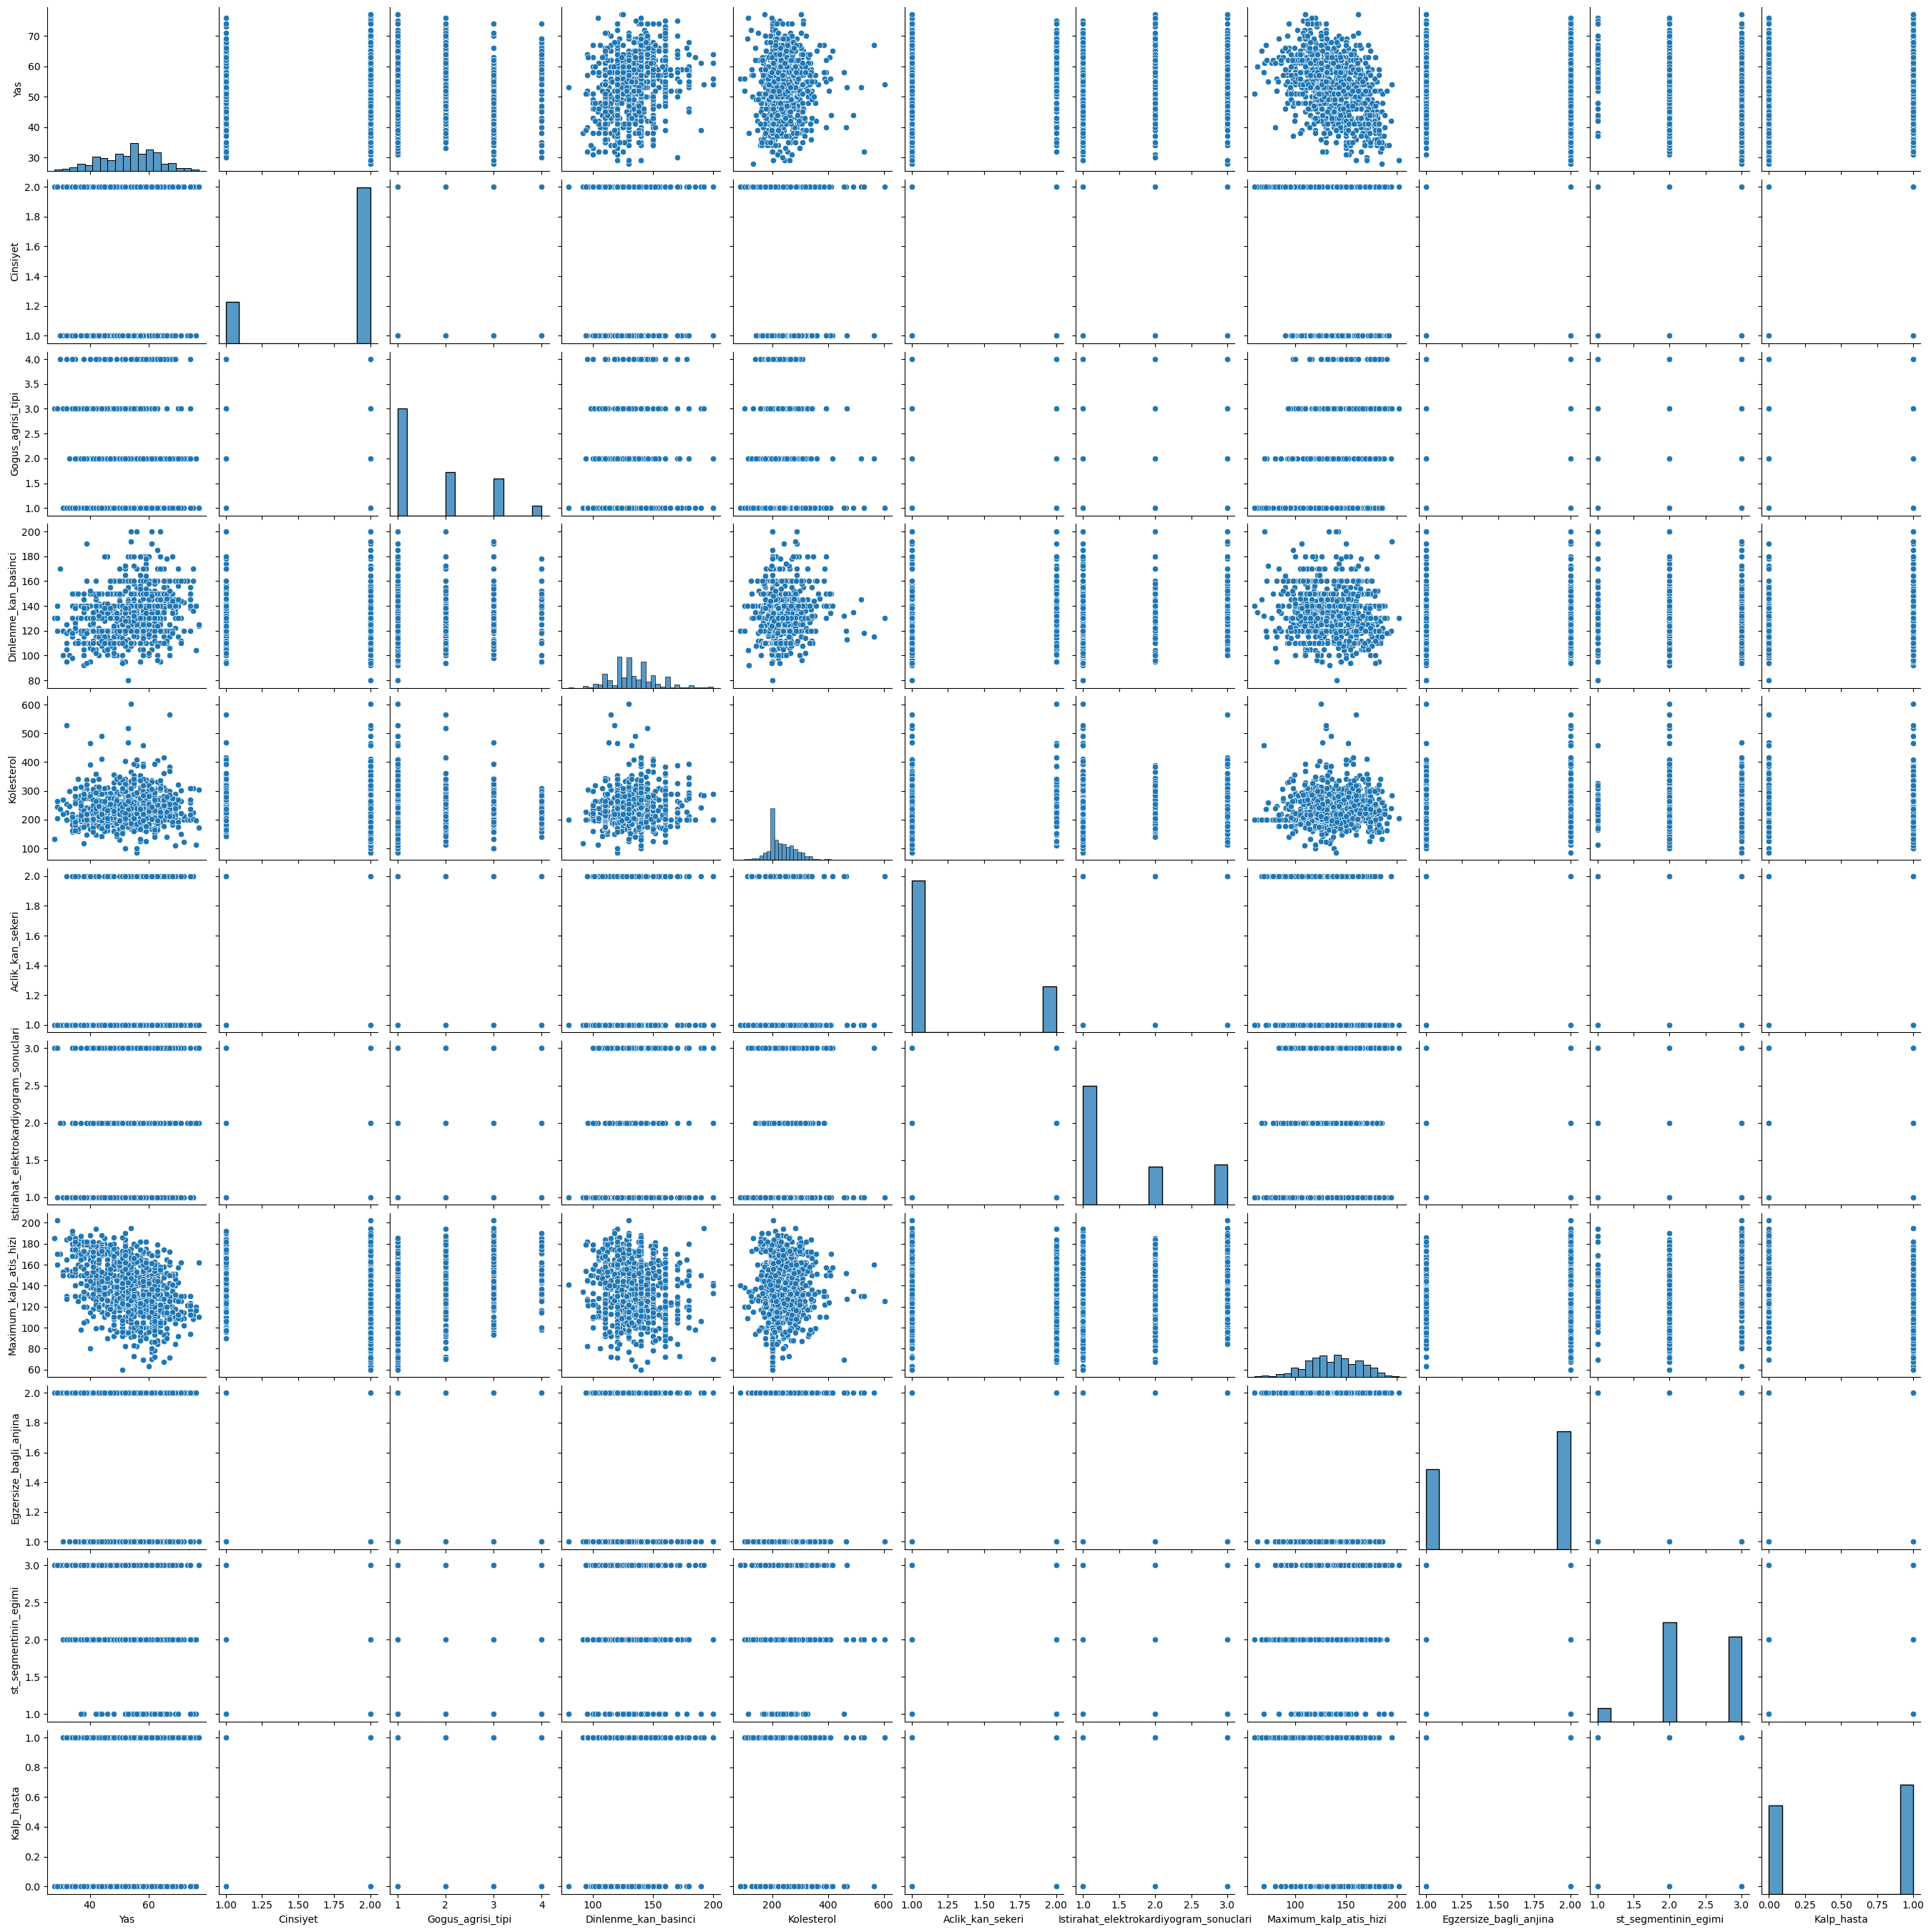

In [117]:
sns.pairplot(data)
plt.show()

In [118]:
print(data_say['Kalp_hasta'].isnull().sum())

0


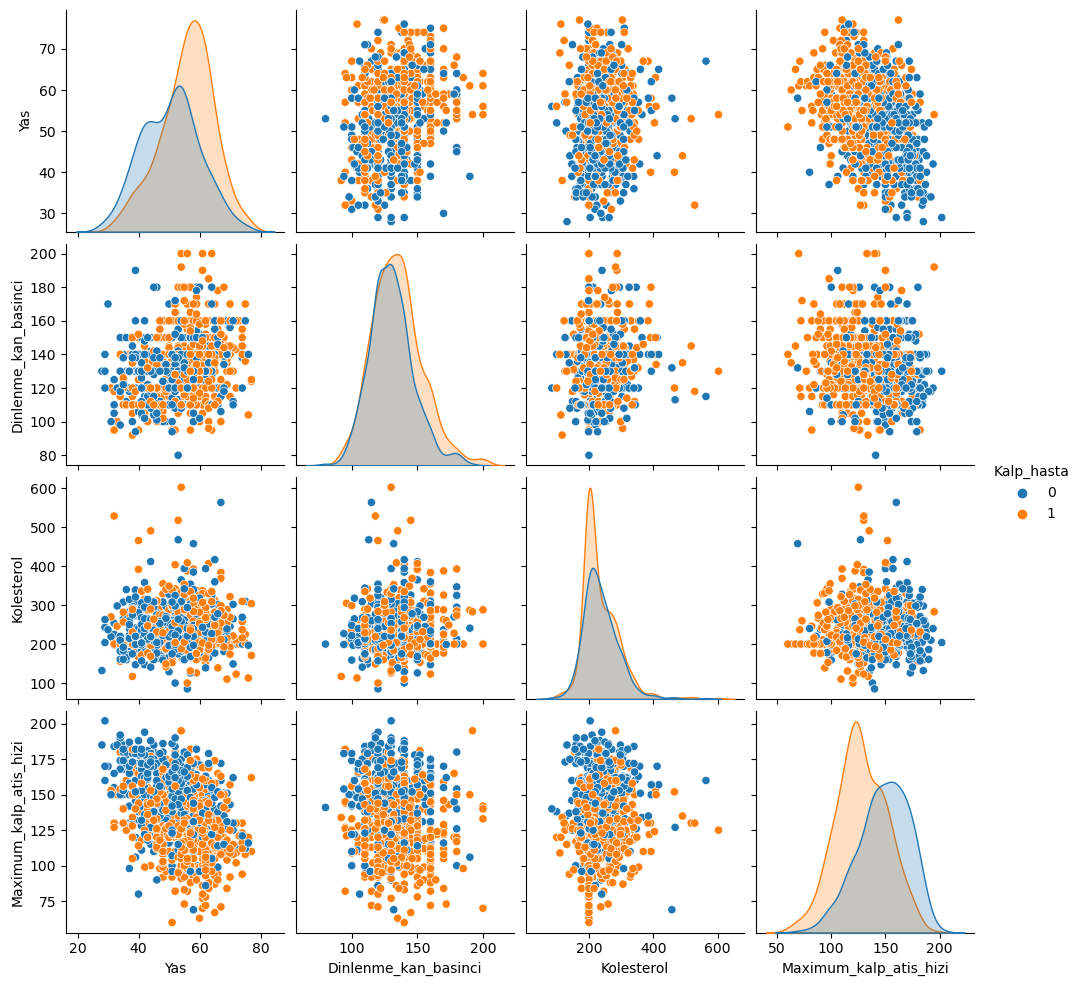

In [119]:
sns.pairplot(data_say, hue="Kalp_hasta", diag_kind="kde")
plt.show()

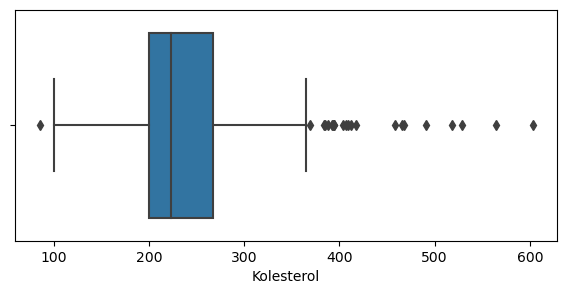

In [120]:
plt.figure(figsize=(7,3))
sns.boxplot(x='Kolesterol', data=data)
plt.show()

In [121]:
ages = data["Kolesterol"]

q1 = np.percentile(ages, 25)
q3 = np.percentile(ages, 75)
print("Q1: ", q1)
print("Q3: ", q3)

IQR = q3 - q1
print("IQR: ", IQR)

upper = q3 + (1.5 * IQR)
lower = q1 - (1.5 * IQR)
print("Lower bound: ", lower)
print("Upper bound: ", upper)

normal = (ages > lower) & (ages < upper)
outliers=(ages < lower) & (ages > upper)

print("Outliers:\n", outliers)

temizlenmiş = data[normal]
print("Orijinal değerler ", len(data))
print("Temizlenmiş değerler ", len(temizlenmiş))

data = temizlenmiş

temizlenmiş.reset_index(drop=True, inplace=True)
print(":\n", temizlenmiş)

Q1:  200.11111111111111
Q3:  267.0
IQR:  66.88888888888889
Lower bound:  99.77777777777779
Upper bound:  367.3333333333333
Outliers:
 0      False
1      False
2      False
3      False
4      False
       ...  
913    False
914    False
915    False
916    False
917    False
Name: Kolesterol, Length: 918, dtype: bool
Orijinal değerler  918
Temizlenmiş değerler  896
:
      Yas  Cinsiyet  Gogus_agrisi_tipi  Dinlenme_kan_basinci  Kolesterol  \
0     40         2                  3                 140.0       289.0   
1     49         1                  2                 160.0       180.0   
2     37         2                  3                 130.0       283.0   
3     48         1                  1                 138.0       214.0   
4     54         2                  2                 150.0       195.0   
..   ...       ...                ...                   ...         ...   
891   45         2                  4                 110.0       264.0   
892   68         2          

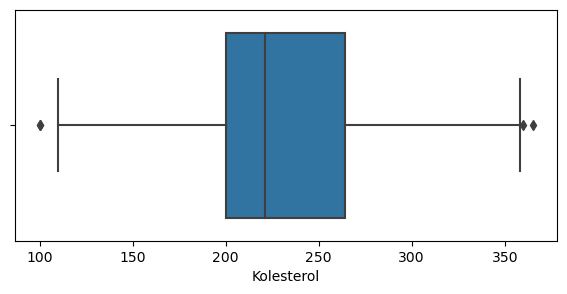

In [122]:
plt.figure(figsize=(7,3))
sns.boxplot(x='Kolesterol', data=data)
plt.show()

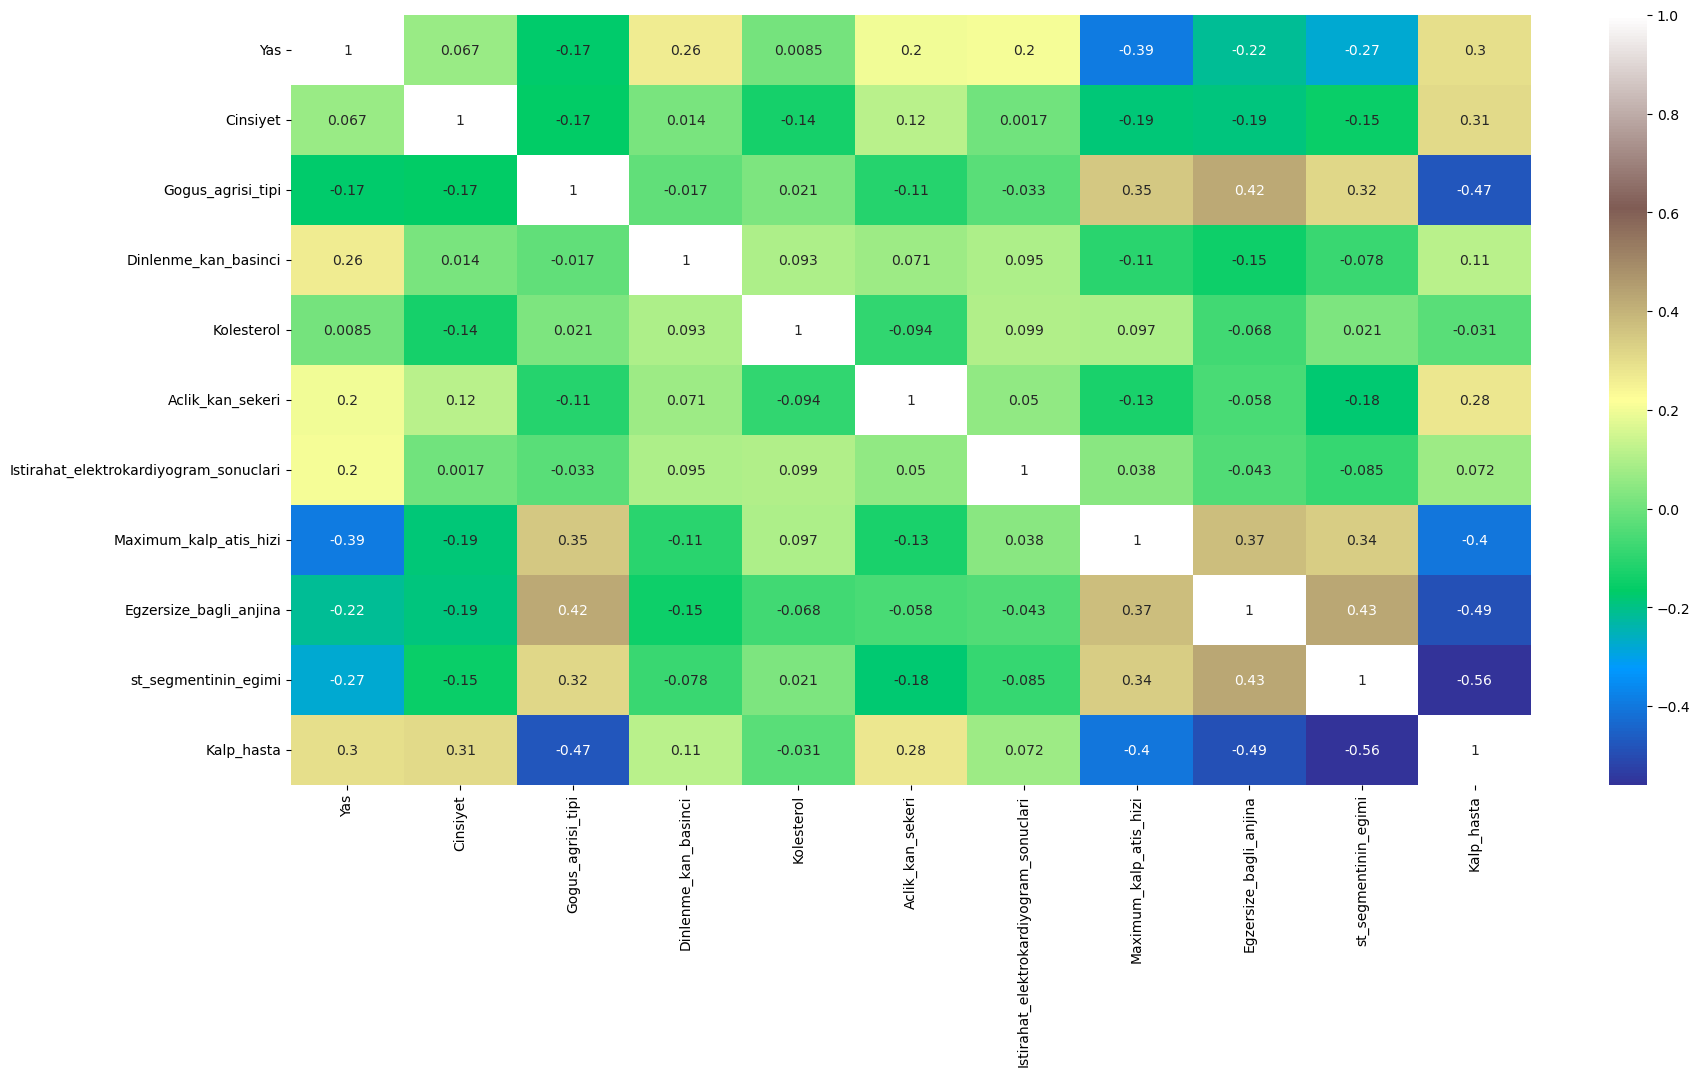

In [123]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), annot=True, cmap='terrain')
plt.show()

In [124]:
scaler=StandardScaler()
scaled_array=scaler.fit_transform(data[sayisal[:-1]])
scaled_array

array([[-1.43025027,  0.42370375,  1.2510136 ,  1.37624666],
       [-0.47572423,  1.53610058, -1.12800497,  0.74966281],
       [-1.74842562, -0.13249467,  1.12005845, -1.52170362],
       ...,
       [ 0.37274337, -0.13249467, -2.19747203, -0.85595829],
       [ 0.37274337, -0.13249467,  0.0942431 ,  1.45456964],
       [-1.64236717,  0.31246407, -1.23713426,  1.41540815]])

In [125]:
data1=data.copy()
data1

,Yas,Cinsiyet,Gogus_agrisi_tipi,Dinlenme_kan_basinci,Kolesterol,Aclik_kan_sekeri,Istirahat_elektrokardiyogram_sonuclari,Maximum_kalp_atis_hizi,Egzersize_bagli_anjina,st_segmentinin_egimi,Kalp_hasta
0,40,2,3,140.0,289.0,1,1,172,2,3,0
1,49,1,2,160.0,180.0,1,1,156,2,2,1
2,37,2,3,130.0,283.0,1,2,98,2,3,0
3,48,1,1,138.0,214.0,1,1,108,1,2,1
4,54,2,2,150.0,195.0,1,1,122,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...
891,45,2,4,110.0,264.0,1,1,132,2,2,1
892,68,2,1,144.0,193.0,2,1,141,2,2,1
893,57,2,1,130.0,131.0,1,1,115,1,2,1
894,57,1,3,130.0,236.0,1,3,174,2,2,1


In [126]:
data1 =pd.get_dummies(data1, columns=kategorik[:-1],drop_first=True)
data1

,Yas,Dinlenme_kan_basinci,Kolesterol,Maximum_kalp_atis_hizi,Kalp_hasta,Cinsiyet_2,Gogus_agrisi_tipi_2,Gogus_agrisi_tipi_3,Gogus_agrisi_tipi_4,Aclik_kan_sekeri_2,Istirahat_elektrokardiyogram_sonuclari_2,Istirahat_elektrokardiyogram_sonuclari_3,Egzersize_bagli_anjina_2,st_segmentinin_egimi_2,st_segmentinin_egimi_3
0,40,140.0,289.0,172,0,True,False,True,False,False,False,False,True,False,True
1,49,160.0,180.0,156,1,False,True,False,False,False,False,False,True,True,False
2,37,130.0,283.0,98,0,True,False,True,False,False,True,False,True,False,True
3,48,138.0,214.0,108,1,False,False,False,False,False,False,False,False,True,False
4,54,150.0,195.0,122,0,True,True,False,False,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891,45,110.0,264.0,132,1,True,False,False,True,False,False,False,True,True,False
892,68,144.0,193.0,141,1,True,False,False,False,True,False,False,True,True,False
893,57,130.0,131.0,115,1,True,False,False,False,False,False,False,False,True,False
894,57,130.0,236.0,174,1,False,False,True,False,False,False,True,True,True,False


In [127]:
data1= data1.replace({True: 1, False: 0})
data1

,Yas,Dinlenme_kan_basinci,Kolesterol,Maximum_kalp_atis_hizi,Kalp_hasta,Cinsiyet_2,Gogus_agrisi_tipi_2,Gogus_agrisi_tipi_3,Gogus_agrisi_tipi_4,Aclik_kan_sekeri_2,Istirahat_elektrokardiyogram_sonuclari_2,Istirahat_elektrokardiyogram_sonuclari_3,Egzersize_bagli_anjina_2,st_segmentinin_egimi_2,st_segmentinin_egimi_3
0,40,140.0,289.0,172,0,1,0,1,0,0,0,0,1,0,1
1,49,160.0,180.0,156,1,0,1,0,0,0,0,0,1,1,0
2,37,130.0,283.0,98,0,1,0,1,0,0,1,0,1,0,1
3,48,138.0,214.0,108,1,0,0,0,0,0,0,0,0,1,0
4,54,150.0,195.0,122,0,1,1,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891,45,110.0,264.0,132,1,1,0,0,1,0,0,0,1,1,0
892,68,144.0,193.0,141,1,1,0,0,0,1,0,0,1,1,0
893,57,130.0,131.0,115,1,1,0,0,0,0,0,0,0,1,0
894,57,130.0,236.0,174,1,0,0,1,0,0,0,1,1,1,0


In [128]:
X=data1.drop(columns=["Kalp_hasta"],axis=1)
y=data1[["Kalp_hasta"]]

In [129]:
X

,Yas,Dinlenme_kan_basinci,Kolesterol,Maximum_kalp_atis_hizi,Cinsiyet_2,Gogus_agrisi_tipi_2,Gogus_agrisi_tipi_3,Gogus_agrisi_tipi_4,Aclik_kan_sekeri_2,Istirahat_elektrokardiyogram_sonuclari_2,Istirahat_elektrokardiyogram_sonuclari_3,Egzersize_bagli_anjina_2,st_segmentinin_egimi_2,st_segmentinin_egimi_3
0,40,140.0,289.0,172,1,0,1,0,0,0,0,1,0,1
1,49,160.0,180.0,156,0,1,0,0,0,0,0,1,1,0
2,37,130.0,283.0,98,1,0,1,0,0,1,0,1,0,1
3,48,138.0,214.0,108,0,0,0,0,0,0,0,0,1,0
4,54,150.0,195.0,122,1,1,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891,45,110.0,264.0,132,1,0,0,1,0,0,0,1,1,0
892,68,144.0,193.0,141,1,0,0,0,1,0,0,1,1,0
893,57,130.0,131.0,115,1,0,0,0,0,0,0,0,1,0
894,57,130.0,236.0,174,0,0,1,0,0,0,1,1,1,0


In [130]:
y

,Kalp_hasta
0,0
1,1
2,0
3,1
4,0
...,...
891,1
892,1
893,1
894,1


In [131]:
X[sayisal[:-1]]=scaler.fit_transform(X[sayisal[:-1]])
X

,Yas,Dinlenme_kan_basinci,Kolesterol,Maximum_kalp_atis_hizi,Cinsiyet_2,Gogus_agrisi_tipi_2,Gogus_agrisi_tipi_3,Gogus_agrisi_tipi_4,Aclik_kan_sekeri_2,Istirahat_elektrokardiyogram_sonuclari_2,Istirahat_elektrokardiyogram_sonuclari_3,Egzersize_bagli_anjina_2,st_segmentinin_egimi_2,st_segmentinin_egimi_3
0,-1.430250,0.423704,1.251014,1.376247,1,0,1,0,0,0,0,1,0,1
1,-0.475724,1.536101,-1.128005,0.749663,0,1,0,0,0,0,0,1,1,0
2,-1.748426,-0.132495,1.120058,-1.521704,1,0,1,0,0,1,0,1,0,1
3,-0.581783,0.312464,-0.385926,-1.130089,0,0,0,0,0,0,0,0,1,0
4,0.054568,0.979902,-0.800617,-0.581828,1,1,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891,-0.899958,-1.244891,0.705367,-0.190213,1,0,0,1,0,0,0,1,1,0
892,1.539386,0.646183,-0.844269,0.162240,1,0,0,0,1,0,0,1,1,0
893,0.372743,-0.132495,-2.197472,-0.855958,1,0,0,0,0,0,0,0,1,0
894,0.372743,-0.132495,0.094243,1.454570,0,0,1,0,0,0,1,1,1,0


In [132]:
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,train_size=0.8,random_state=33)

In [133]:
print('Xtrain-', Xtrain.size)
print('Xtest-',Xtest.size)
print('ytrain-', ytrain.size)
print('ytest-', ytest.size)
print('Xtrain-', Xtrain.shape)
print('Xtest-',Xtest.shape)
print('ytrain-', ytrain.shape)
print('ytest-', ytest.shape)

Xtrain- 10024
Xtest- 2520
ytrain- 716
ytest- 180
Xtrain- (716, 14)
Xtest- (180, 14)
ytrain- (716, 1)
ytest- (180, 1)


In [134]:
tree=DecisionTreeClassifier()
model=tree.fit(Xtrain,ytrain)
y_pred=model.predict(Xtest)
model.score(Xtest,ytest)#== 
print("Test Accuracy",accuracy_score(y_pred,ytest))

Test Accuracy 0.7555555555555555


In [135]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

model1=lr.fit(Xtrain,ytrain)

ypred_proba=model1.predict_proba(Xtest)
print("0 %lik"+"   1 %lik")
print(np.round(ypred_proba,2))
print("Adet-->",len(ypred_proba))

0 %lik   1 %lik
[[0.96 0.04]
 [0.95 0.05]
 [0.06 0.94]
 [0.06 0.94]
 [0.06 0.94]
 [0.39 0.61]
 [0.49 0.51]
 [0.04 0.96]
 [0.92 0.08]
 [0.55 0.45]
 [0.53 0.47]
 [0.09 0.91]
 [0.06 0.94]
 [0.13 0.87]
 [0.32 0.68]
 [0.06 0.94]
 [0.78 0.22]
 [0.06 0.94]
 [0.05 0.95]
 [0.01 0.99]
 [0.67 0.33]
 [0.12 0.88]
 [0.08 0.92]
 [0.98 0.02]
 [0.06 0.94]
 [0.93 0.07]
 [0.86 0.14]
 [0.95 0.05]
 [0.03 0.97]
 [0.62 0.38]
 [0.02 0.98]
 [0.38 0.62]
 [0.05 0.95]
 [0.31 0.69]
 [0.92 0.08]
 [0.92 0.08]
 [0.44 0.56]
 [0.04 0.96]
 [0.34 0.66]
 [0.07 0.93]
 [0.92 0.08]
 [0.99 0.01]
 [0.91 0.09]
 [0.05 0.95]
 [0.09 0.91]
 [0.58 0.42]
 [0.63 0.37]
 [0.98 0.02]
 [0.81 0.19]
 [0.04 0.96]
 [0.03 0.97]
 [0.09 0.91]
 [0.01 0.99]
 [0.06 0.94]
 [0.53 0.47]
 [0.2  0.8 ]
 [0.12 0.88]
 [0.55 0.45]
 [0.02 0.98]
 [0.87 0.13]
 [0.99 0.01]
 [0.75 0.25]
 [0.24 0.76]
 [0.03 0.97]
 [0.63 0.37]
 [0.54 0.46]
 [0.02 0.98]
 [0.88 0.12]
 [0.82 0.18]
 [0.89 0.11]
 [0.06 0.94]
 [0.8  0.2 ]
 [0.92 0.08]
 [0.13 0.87]
 [0.97 0.03]
 [0.12 0.

In [136]:
y_pred=np.argmax(ypred_proba,axis=1)
y_pred

array([0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0], dtype=int64)

In [137]:
dummy=pd.DataFrame(ypred_proba)
dummy["ypred"]=y_pred
dummy

,0,1,ypred
0,0.962104,0.037896,0
1,0.947193,0.052807,0
2,0.062804,0.937196,1
3,0.063937,0.936063,1
4,0.055302,0.944698,1
...,...,...,...
175,0.943177,0.056823,0
176,0.555364,0.444636,0
177,0.726284,0.273716,0
178,0.917087,0.082913,0


In [138]:
print("Test Accuracy",accuracy_score(y_pred,ytest))

Test Accuracy 0.85


In [139]:
lr = LogisticRegression(max_iter=1000)

param_grid = {
    'C': [0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, n_jobs=-1)


grid_search.fit(Xtrain, ytrain)

print("En iyi parametreler:", grid_search.best_params_)
print("En iyi skor:", grid_search.best_score_)

En iyi parametreler: {'C': 1, 'solver': 'newton-cg'}
En iyi skor: 0.8533605283605283


In [140]:
lr = LogisticRegression(max_iter=1000, C=100, solver='liblinear')
model1 = lr.fit(Xtrain, ytrain)
model1.score(Xtest,ytest)

prediction1 = model1.predict(Xtest)
Lr=accuracy_score(ytest,prediction1)
print("RAPOR",classification_report(y_pred, prediction1))
print("Matris",confusion_matrix(y_pred, prediction1))
print("skor",accuracy_score(y_pred,prediction1))

RAPOR               precision    recall  f1-score   support

           0       1.00      0.99      0.99        81
           1       0.99      1.00      0.99        99

    accuracy                           0.99       180
   macro avg       0.99      0.99      0.99       180
weighted avg       0.99      0.99      0.99       180

Matris [[80  1]
 [ 0 99]]
skor 0.9944444444444445


In [141]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier()
model2 = rfc.fit(Xtrain, ytrain)
model2.score(Xtest,ytest)

prediction2 = model2.predict(Xtest)

print("Matris",confusion_matrix(ytest, prediction2))
print("skor",accuracy_score(y_pred,prediction2))

Matris [[68 16]
 [11 85]]
skor 0.9111111111111111


In [142]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

rf = RandomForestClassifier()
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1)

grid_search.fit(Xtrain, ytrain)

print("En iyi parametreler:", grid_search.best_params_)
print("En iyi skor:", grid_search.best_score_)

En iyi parametreler: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
En iyi skor: 0.8631313131313132


In [143]:
rf = RandomForestClassifier(max_depth= 10, min_samples_leaf= 1, min_samples_split= 5, n_estimators= 200)
model2 = rfc.fit(Xtrain, ytrain)
model2.score(Xtest,ytest)
Rf=accuracy_score(ytest,prediction2)*100
prediction2 = model2.predict(Xtest)
print("RAPOR",classification_report(ytest, prediction2))
print("Matris\n",confusion_matrix(ytest, prediction2))
print("skor",accuracy_score(y_pred,prediction2)*100)

RAPOR               precision    recall  f1-score   support

           0       0.88      0.83      0.85        84
           1       0.86      0.90      0.88        96

    accuracy                           0.87       180
   macro avg       0.87      0.86      0.87       180
weighted avg       0.87      0.87      0.87       180

Matris
 [[70 14]
 [10 86]]
skor 93.88888888888889


In [78]:
from sklearn.tree import DecisionTreeClassifier

dtc=DecisionTreeClassifier()
model3=dtc.fit(Xtrain,ytrain)
prediction3=model3.predict(Xtest)
print("Matris\n",confusion_matrix(ytest, prediction3))
print("SKOR",accuracy_score(y_pred,prediction3)*100)

Matris
 [[68 16]
 [28 68]]
SKOR 81.66666666666667


In [79]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

dt = DecisionTreeClassifier()

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, n_jobs=-1)

grid_search.fit(Xtrain, ytrain)

print("En iyi parametreler:", grid_search.best_params_)
print("En iyi skor:", grid_search.best_score_)

En iyi parametreler: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}
En iyi skor: 0.8044483294483294


In [80]:
dt = DecisionTreeClassifier(criterion="entropy",max_depth=10,min_samples_leaf=4,min_samples_split=2)
model3 = dt.fit(Xtrain, ytrain)
prediction3 = model3.predict(Xtest)
confusion_matrix(y_pred, prediction3)
Dt=accuracy_score(y_pred,prediction3)*100
print("RAPOR",classification_report(y_pred, prediction3))
print("Matris\n",confusion_matrix(y_pred, prediction3))
print("SKOR",accuracy_score(y_pred,prediction3)*100)

RAPOR               precision    recall  f1-score   support

           0       0.82      0.85      0.84        81
           1       0.88      0.85      0.86        99

    accuracy                           0.85       180
   macro avg       0.85      0.85      0.85       180
weighted avg       0.85      0.85      0.85       180

Matris
 [[69 12]
 [15 84]]
SKOR 85.0


In [81]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

In [82]:
svm=SVC()
model5=svm.fit(Xtrain,ytrain)
prediction5=model5.predict(Xtest)
confusion_matrix(ytest, prediction5)
print("Matris\n",confusion_matrix(y_pred, prediction5))
print("SKOR",accuracy_score(y_pred,prediction5)*100)

Matris
 [[76  5]
 [ 7 92]]
SKOR 93.33333333333333


In [83]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

svc = SVC()

param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}


grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, n_jobs=-1)

grid_search.fit(Xtrain, ytrain)

print("En iyi parametreler:", grid_search.best_params_)
print("En iyi skor:", grid_search.best_score_)


En iyi parametreler: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
En iyi skor: 0.8645104895104897


In [84]:
svm=SVC(C=10,gamma="auto",kernel="rbf")
model5=svm.fit(Xtrain,ytrain)
prediction5=model5.predict(Xtest)

SVC=accuracy_score(ytest,prediction5)*100
print("RAPOR",classification_report(y_pred, prediction5))
print("Matris\n",confusion_matrix(y_pred, prediction5))
print("SKOR",accuracy_score(y_pred,prediction5)*100)

RAPOR               precision    recall  f1-score   support

           0       0.91      0.91      0.91        81
           1       0.93      0.93      0.93        99

    accuracy                           0.92       180
   macro avg       0.92      0.92      0.92       180
weighted avg       0.92      0.92      0.92       180

Matris
 [[74  7]
 [ 7 92]]
SKOR 92.22222222222223


In [85]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
NB = GaussianNB()
model6 = NB.fit(Xtrain, ytrain)
prediction6 = model6.predict(Xtest)
NB=accuracy_score(ytest,prediction6)*100
print("RAPOR : ",classification_report(y_pred, prediction6))
print("Matris\n : ",confusion_matrix(y_pred, prediction6))
print("SKOR : ",accuracy_score(y_pred,prediction6)*100)

RAPOR :                precision    recall  f1-score   support

           0       0.90      0.94      0.92        81
           1       0.95      0.92      0.93        99

    accuracy                           0.93       180
   macro avg       0.93      0.93      0.93       180
weighted avg       0.93      0.93      0.93       180

Matris
 :  [[76  5]
 [ 8 91]]
SKOR :  92.77777777777779


In [86]:
knn = KNeighborsClassifier()


param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}


grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(Xtrain, ytrain)


print("En iyi parametreler:", grid_search.best_params_)
print("En iyi skor:", grid_search.best_score_)

En iyi parametreler: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'uniform'}
En iyi skor: 0.8505730380730381


In [87]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

KNN = KNeighborsClassifier(metric="manhattan",n_neighbors=9,weights="uniform")
model7 = KNN.fit(Xtrain, ytrain)
prediction7 = model7.predict(Xtest)
KNN=accuracy_score(ytest,prediction7)*100
print("RAPOR",classification_report(y_pred, prediction7))
print("Matris\n",confusion_matrix(y_pred, prediction7))
print("SKOR",accuracy_score(y_pred,prediction7)*100)

RAPOR               precision    recall  f1-score   support

           0       0.94      0.89      0.91        81
           1       0.91      0.95      0.93        99

    accuracy                           0.92       180
   macro avg       0.92      0.92      0.92       180
weighted avg       0.92      0.92      0.92       180

Matris
 [[72  9]
 [ 5 94]]
SKOR 92.22222222222223


In [150]:
single_prediction = model7.predict([X.iloc[0]])
print("İlk satır için tahmin:", single_prediction)

İlk satır için tahmin: [0]


In [88]:
sonuc = {
    'Model': ['KNN', 'Logistic Regression', 'Decision Tree', 'Random Forest', 'Naive Bayes', 'SVC'],
    'SKOR': [accuracy_score(y_pred, prediction7),
                 accuracy_score(y_pred, prediction1),
                 accuracy_score(y_pred, prediction3),
                 accuracy_score(y_pred, prediction2),
                 accuracy_score(y_pred, prediction6),
                 accuracy_score(y_pred, prediction5)]
}

df_sonuc = pd.DataFrame(sonuc)

print(df_sonuc)

en_yüksekskor = df_sonuc['SKOR'].max()
en_iyimodel = df_sonuc.loc[df_sonuc['SKOR'].idxmax(), 'Model']

print("\nEn yüksek doğruluk skoru:", en_yüksekskor*100)
print("\nEn iyi model:", en_iyimodel)

                 Model      SKOR
0                  KNN  0.922222
1  Logistic Regression  0.994444
2        Decision Tree  0.850000
3        Random Forest  0.950000
4          Naive Bayes  0.927778
5                  SVC  0.922222

En yüksek doğruluk skoru: 99.44444444444444

En iyi model: Logistic Regression


In [153]:
X.iloc[0]

Yas                                        -0.475724
Dinlenme_kan_basinci                        1.536101
Kolesterol                                 -1.128005
Maximum_kalp_atis_hizi                      0.749663
Cinsiyet_2                                  0.000000
Gogus_agrisi_tipi_2                         1.000000
Gogus_agrisi_tipi_3                         0.000000
Gogus_agrisi_tipi_4                         0.000000
Aclik_kan_sekeri_2                          0.000000
Istirahat_elektrokardiyogram_sonuclari_2    0.000000
Istirahat_elektrokardiyogram_sonuclari_3    0.000000
Egzersize_bagli_anjina_2                    1.000000
st_segmentinin_egimi_2                      1.000000
st_segmentinin_egimi_3                      0.000000
Name: 1, dtype: float64

In [155]:
ilktahmin = model7.predict([X.iloc[0]])
print("İlk satır için tahmin:", ilktahmin)

İlk satır için tahmin: [1]


In [156]:
data

,Yas,Cinsiyet,Gogus_agrisi_tipi,Dinlenme_kan_basinci,Kolesterol,Aclik_kan_sekeri,Istirahat_elektrokardiyogram_sonuclari,Maximum_kalp_atis_hizi,Egzersize_bagli_anjina,st_segmentinin_egimi,Kalp_hasta
0,40,2,3,140.0,289.0,1,1,172,2,3,0
1,49,1,2,160.0,180.0,1,1,156,2,2,1
2,37,2,3,130.0,283.0,1,2,98,2,3,0
3,48,1,1,138.0,214.0,1,1,108,1,2,1
4,54,2,2,150.0,195.0,1,1,122,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...
891,45,2,4,110.0,264.0,1,1,132,2,2,1
892,68,2,1,144.0,193.0,2,1,141,2,2,1
893,57,2,1,130.0,131.0,1,1,115,1,2,1
894,57,1,3,130.0,236.0,1,3,174,2,2,1


In [ ]:
"""Yas=int(input("Yaşınızı giriniz?"))
Cinsiyet=int(input("Cinsiyetinizi [1K | 2E] giriniz? "))
Gogus_agrisi_tipi=int(input("Göğüs ağrısı tipini  giriniz?"))
Dinlenme_kan_basinci=float(input("Dinlenme kan basıncını giriniz?"))
Kolesterol=float(input("Serum kolestrolü değerini giriniz?"))
Aclik_kan_sekeri=int(input("Açlık kan şekeri >120 [1 | 2] giriniz?"))
Istirahat_elektrokardiyogram_sonuclari=int(input("Dinlenme elektrokardiyografik sonuçları giriniz?"))
Maximum_kalp_atis_hizi=int(input("max kalp atış hızı giriniz?"))
Egzersize_bagli_anjina=int(input("Egzersizle tetiklenen anjina [1|2] giriniz?"))
st_segmentinin_egimi=int(input("Egzersizin ST segmentinin eğimi giriniz?"))
a
new_data=pd.DataFrame({'Yas':[Yas],
                       'Cinsiyet':[Cinsiyet],
                       'Gogus_agrisi_tipi':[Gogus_agrisi_tipi],
                       'Dinlenme_kan_basinci':[Dinlenme_kan_basinci],
                     'Kolesterol':[Kolesterol],
                     'Aclik_kan_sekeri':[Aclik_kan_sekeri],
                      'Istirahat_elektrokardiyogram_sonuclari':[Istirahat_elektrokardiyogram_sonuclari],
                      'Maximum_kalp_atis_hizi':[Maximum_kalp_atis_hizi],
                      'Egzersize_bagli_anjina':[Egzersize_bagli_anjina],
                      'st_segmentinin_egimi':[st_segmentinin_egimi],
                       })
"""

In [ ]:
""""secim=int(input("Hangi Algoritmayı kullanmak istersiniz?\n1-DecisionTreeClassifier\n2-RandomForestClassifier\n3-SVC\n4-GaussianNB\n5-KNeighborsClassifier\n6-LogisticRegression"))

if secim==1:
    from sklearn.tree import DecisionTreeClassifier

    dtc=DecisionTreeClassifier()
    model2=dtc.fit(Xtrain,ytrain)
    prediction2=model2.predict(new_data)
    if prediction2[0]==1:
        print("DecisionTreeClassifier algoritması kullanarak eğitilmiş bir  model ile tahmini  Kalp hastası olma olasılığınız YÜKSEK!!!")
    else:
        print("DecisionTreeClassifier algoritması kullanarak eğitilmiş bir  model ile tahmini  Kalp hastası olma olasılığınız DÜŞÜK!")
elif secim==2:
    from sklearn.ensemble import RandomForestClassifier

    rfc=RandomForestClassifier()
    model3 = rfc.fit(Xtrain, ytrain)
    prediction3 = model3.predict(new_data)
    if prediction3[0]==1:
        print("RandomForestClassifier algoritması kullanarak eğitilmiş bir  model ile tahmini  Kalp hastası olma olasılığınız YÜKSEK!!!")
    else:
        print("RandomForestClassifier algoritması kullanarak eğitilmiş bir  model ile tahmini  Kalp hastası olma olasılığınız DÜŞÜK!")
        
elif secim==3:
    from sklearn.model_selection import KFold
    from sklearn.model_selection import cross_val_score
    from sklearn.svm import SVC
    svm=SVC()
    model4=svm.fit(Xtrain,ytrain)
    prediction4=model4.predict(new_data)
    if prediction4[0]==1:
        print("SVC algoritması kullanarak eğitilmiş bir  model ile tahmini  Kalp hastası olma olasılığınız YÜKSEK!!!")
    else:
        print("SVC algoritması kullanarak eğitilmiş bir  model ile tahmini  Kalp hastası olma olasılığınız DÜŞÜK!")
elif secim==4:
    from sklearn.naive_bayes import GaussianNB

    NB = GaussianNB()
    model5 = NB.fit(Xtrain, ytrain)
    prediction5 = model5.predict(new_data)
    if prediction5[0]==1:
        print("GaussianNB algoritması kullanarak eğitilmiş bir  model ile tahmini  Kalp hastası olma olasılığınız YÜKSEK!!!")
    else:
        print("GaussianNB algoritması kullanarak eğitilmiş bir  model ile tahmini  Kalp hastası olma olasılığınız DÜŞÜK!")

elif secim==5:
    from sklearn.neighbors import KNeighborsClassifier

    KNN = KNeighborsClassifier()
    model6 = KNN.fit(Xtrain, ytrain)
    prediction6 = model6.predict(new_data)
    if prediction6[0]==1:
        print("KNeighborsClassifier algoritması kullanarak eğitilmiş bir  model ile tahmini  Kalp hastası olma olasılığınız YÜKSEK!!!")
    else:
        print("KNeighborsClassifier algoritması kullanarak eğitilmiş bir  model ile tahmini  Kalp hastası olma olasılığınız DÜŞÜK!")
elif secim==6:
    from sklearn.linear_model import LogisticRegression
    lr=LogisticRegression()

    model7=lr.fit(Xtrain,ytrain)
    prediction7=model1.predict(new_data)
    
    if prediction7[0]==1:
        print("LogisticRegression algoritması kullanarak eğitilmiş bir  model ile tahmini  Kalp hastası olma olasılığınız YÜKSEK!!!")
    else:
        print("LogisticRegression algoritması kullanarak eğitilmiş bir  model ile tahmini  Kalp hastası olma olasılığınız DÜŞÜK!")
                              

#### 